# AULA 4

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sms

In [2]:
dados_url = 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true'
dados = pd.read_csv(dados_url, compression = 'zip')

In [19]:
dados.head()

,id,tratamento,tempo,dose,composto,g0,g1,g2,g3,g4,...,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


In [3]:
for i in range (len(dados.columns)):
    to_list = list(dados.columns[i])
    if (np.isin(to_list[1], '-')) ==  True:
        (to_list).remove('-')
        new_column = ''.join(to_list)
        dados.rename({dados.columns[i]:new_column}, axis=1, inplace=True)
        
        


In [4]:
mapa = {'droga': 'composto'}
dados.rename(columns=mapa, inplace=True)

In [20]:
dados.head()

,id,tratamento,tempo,dose,composto,g0,g1,g2,g3,g4,...,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


# IMPORTANDO O NOVO BANCO DE DADOS

In [5]:
dados_resultados = pd.read_csv('https://github.com/alura-cursos/imersao-dados-desafio-final/blob/main/Dados/dados_resultados.csv?raw=true')
dados_resultados.head()



,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
dados_resultados['acat_inhibitor'].unique()

contagem_moa = dados_resultados.drop('id', axis=1).sum().sort_values(ascending = False)
contagem_moa



nfkb_inhibitor                                832
proteasome_inhibitor                          726
cyclooxygenase_inhibitor                      435
dopamine_receptor_antagonist                  424
serotonin_receptor_antagonist                 404
                                             ... 
protein_phosphatase_inhibitor                   6
autotaxin_inhibitor                             6
diuretic                                        6
erbb2_inhibitor                                 1
atp-sensitive_potassium_channel_antagonist      1
Length: 206, dtype: int64

# DESAFIO 1: VERIFICAR OS TOP-10 MOA

In [7]:
words = dados_resultados.columns[1::]
words


Index(['5-alpha_reductase_inhibitor', '11-beta-hsd1_inhibitor',
       'acat_inhibitor', 'acetylcholine_receptor_agonist',
       'acetylcholine_receptor_antagonist', 'acetylcholinesterase_inhibitor',
       'adenosine_receptor_agonist', 'adenosine_receptor_antagonist',
       'adenylyl_cyclase_activator', 'adrenergic_receptor_agonist',
       ...
       'tropomyosin_receptor_kinase_inhibitor', 'trpv_agonist',
       'trpv_antagonist', 'tubulin_inhibitor', 'tyrosine_kinase_inhibitor',
       'ubiquitin_specific_protease_inhibitor', 'vegfr_inhibitor', 'vitamin_b',
       'vitamin_d_receptor_agonist', 'wnt_inhibitor'],
      dtype='object', length=206)

In [8]:
new_words=[]
for i in range (len(words)):
    new_words.append(words[i].split('_')[-1])
new_words


['inhibitor',
 'inhibitor',
 'inhibitor',
 'agonist',
 'antagonist',
 'inhibitor',
 'agonist',
 'antagonist',
 'activator',
 'agonist',
 'antagonist',
 'inhibitor',
 'inhibitor',
 'inhibitor',
 'activator',
 'analgesic',
 'agonist',
 'antagonist',
 'local',
 'inhibitor',
 'antagonist',
 'anti-inflammatory',
 'antiarrhythmic',
 'antibiotic',
 'anticonvulsant',
 'antifungal',
 'antihistamine',
 'antimalarial',
 'antioxidant',
 'antiprotozoal',
 'antiviral',
 'stimulant',
 'inhibitor',
 'inhibitor',
 'antagonist',
 'inhibitor',
 'inhibitor',
 'inhibitor',
 'inhibitor',
 'inhibitor',
 'inhibitor',
 'inhibitor',
 'antifolate',
 'inhibitor',
 'inhibitor',
 'inhibitor',
 'inhibitor',
 'inhibitor',
 'inhibitor',
 'agonist',
 'inhibitor',
 'inhibitor',
 'inhibitor',
 'inhibitor',
 'blocker',
 'agonist',
 'antagonist',
 'inhibitor',
 'inhibitor',
 'activator',
 'inhibitor',
 'antagonist',
 'antagonist',
 'inhibitor',
 'agent',
 'inhibitor',
 'blocker',
 'inhibitor',
 'antagonist',
 'inhibitor',


In [9]:
new_df=pd.DataFrame(new_words, columns = ['MOA']).drop(203, axis=0)
new_df


,MOA
0,inhibitor
1,inhibitor
2,inhibitor
3,agonist
4,antagonist
...,...
200,inhibitor
201,inhibitor
202,inhibitor
204,agonist


Text(0.5, 0, 'Incidência')

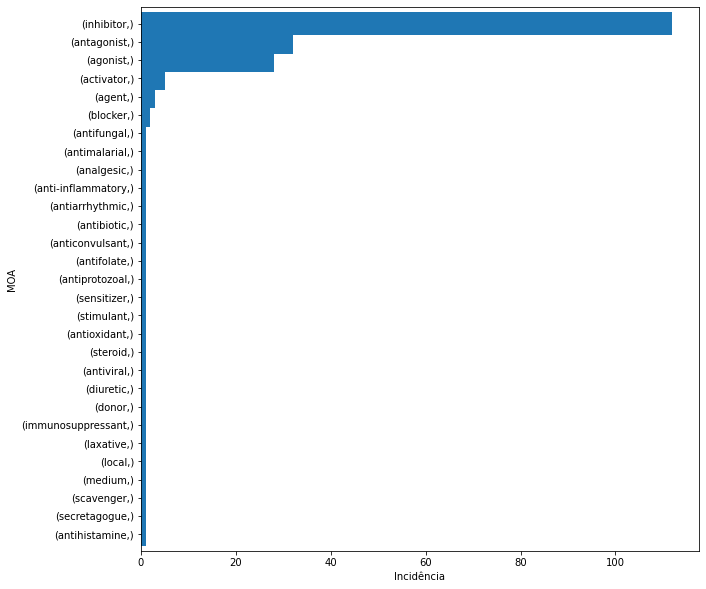

In [10]:
plt.figure(figsize=(10,10))

new_df.value_counts().sort_values().plot(kind='barh', width=1.3)
plt.xlabel('Incidência')


# QUANTIDADE DE MECANISMOS DE AÇÃO ATIVOS POR EXPERIMENTO

In [11]:
dados_resultados.drop('id', axis=1).sum(axis=1)

0        1
1        0
2        3
3        0
4        1
        ..
23809    1
23810    1
23811    0
23812    1
23813    0
Length: 23814, dtype: int64

In [12]:
dados_resultados['n_moa'] = dados_resultados.drop('id', axis=1).sum(axis=1)


In [14]:
dados_resultados['ativo_moa'] = (dados_resultados['n_moa']!=0)

dados_resultados.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor,n_moa,ativo_moa
0,id_000644bb2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,True
1,id_000779bfc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,False
2,id_000a6266a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,True
3,id_0015fd391,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,False
4,id_001626bd3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,True


In [29]:
dados_combinados = pd.merge(dados, dados_resultados[['id','n_moa', 'ativo_moa']], on = 'id')
dados_combinados.head()

,id,tratamento,tempo,dose,composto,g0,g1,g2,g3,g4,...,c92,c93,c94,c95,c96,c97,c98,c99,n_moa,ativo_moa
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,1,True
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,False
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,3,True
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0,False
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,1,True


# COM CONTROLE NÃO TIVEMOS NENHUM MECANISMO DE AÇÃO SENDO ATIVO

In [30]:
dados_combinados.query('tratamento == "com_controle"')['ativo_moa'].value_counts()

False    1866
Name: ativo_moa, dtype: int64

# DESAFIO 2: CRIAR A COLUNA "EH_CONTROLE" PARA QUANDO NA LINHA TRATAMENTO == COM_CONTROLE

In [31]:
dados_combinados['eh_controle'] = (dados_combinados['tratamento']!= 'com_droga')


In [32]:
dados_combinados.head()

,id,tratamento,tempo,dose,composto,g0,g1,g2,g3,g4,...,c93,c94,c95,c96,c97,c98,c99,n_moa,ativo_moa,eh_controle
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,1,True,False
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,False,False
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,3,True,False
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0,False,False
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,1,True,False


# DESAFIO 3: CRIAR AS COLUNAS "EH_24H", "EH_48H" E "EH_72H" 

In [35]:
dados_combinados['eh_24h'] = (dados_combinados['tempo'] == 24)
dados_combinados['eh_48h'] = (dados_combinados['tempo'] == 48)
dados_combinados['eh_72h'] = (dados_combinados['tempo'] == 72)


In [36]:
dados_combinados.head()

,id,tratamento,tempo,dose,composto,g0,g1,g2,g3,g4,...,c96,c97,c98,c99,n_moa,ativo_moa,eh_controle,eh_24h,eh_48h,eh_72h
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,-0.3981,0.2139,0.3801,0.4176,1,True,False,True,False,False
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,0.1522,0.1241,0.6077,0.7371,0,False,False,False,False,True
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,-0.6417,-0.2187,-1.4080,0.6931,3,True,False,False,True,False
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-1.6210,-0.8784,-0.3876,-0.8154,0,False,False,False,True,False
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,0.1094,0.2885,-0.3786,0.7125,1,True,False,False,False,True


In [37]:
dados_combinados.query('tratamento == "com_droga"')['ativo_moa'].value_counts()

True     14447
False     7501
Name: ativo_moa, dtype: int64

# SELECIONANDO OS 5 COMPOSTOS MAIS UTILIZADOS

In [48]:
composto_principal = dados_combinados['composto'].value_counts().index[:6]


In [49]:
composto_principal

Index(['cacb2b860', '87d714366', '9f80f3f77', '8b87a7a83', '5628cb3ee',
       'd08af5d4b'],
      dtype='object')

<AxesSubplot:xlabel='composto', ylabel='g0'>

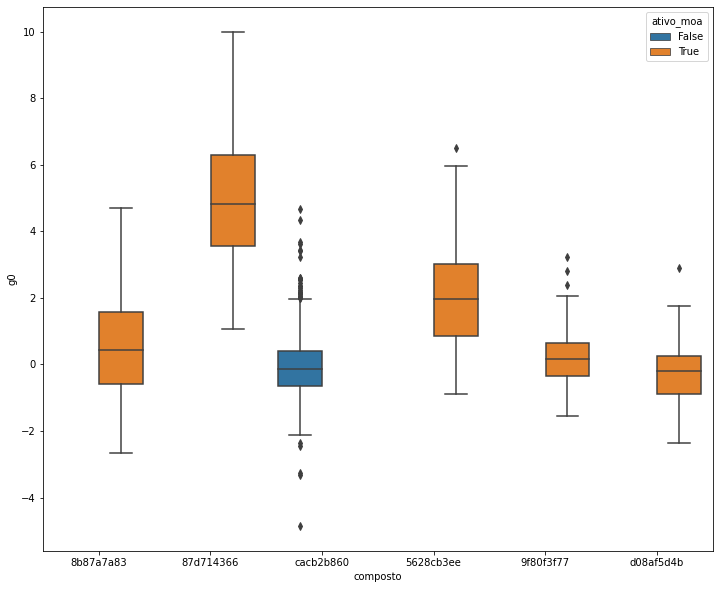

In [50]:
plt.figure(figsize=(12,10))
sms.boxplot(data = dados_combinados.query('composto in @composto_principal'), y= 'g0', x='composto', hue = 'ativo_moa')

# DESAFIO 4: FAZER UMA ANÁLISE MAIS DETALHADA CONSIDERANDO TEMPO E DOSE, PARA COMPARAR AS DISTRIBUIÇÕES (ESCOLHER UMA DROGA E COMPARAR COM O CONTROLE)

# DESAFIO 5: DESCOBRIR SE TEM ALGUM COMPOSTO QUE, DEPENDENDO DA CONFIGURAÇÃO DO EXPERIMENTO, ATIVA OU NÃO O MOA

# DESAFIO 6: DESCOBRIR SE TEM ALGUM COMPOSTO QUE, DEPENDENDO DA CONFIGURAÇÃO DO EXPERIMENTO, ATIVA MOAs DIFERENTES